In [1]:
%matplotlib notebook

from matplotlib import pylab
from matplotlib.cm import colors
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import numpy as np

pylab.rcParams['figure.figsize'] = (10., 10.)

In [2]:
# Generate some fake data

def sigmoid(t):
    return 1./(1 + np.exp(-t))

N = 1000
D = 2
X = np.zeros([N, D])
y = np.zeros(N)
X[:N/2] = np.random.randn(N/2, D) - np.array([1, 1])
X[N/2:] = np.random.randn(N/2, D) + np.array([1, 1])
y[:N/2] = 0
y[N/2:] = 1

lr = LogisticRegression(fit_intercept=False)
lr.fit(X, y)
yhat = lr.predict(X)
w = lr.coef_.squeeze()

In [3]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0., 0.)],
     'green': [(0, 0, 0.), (1, 0., 0.)],
     'blue': [(0, 0., 0.), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [4]:
idx_tp = (y == yhat) & (y == 1)
idx_fp = (y != yhat) & (y == 0)
idx_tn = (y == yhat) & (y == 0)
idx_fn = (y != yhat) & (y == 1)

<IPython.core.display.Javascript object>


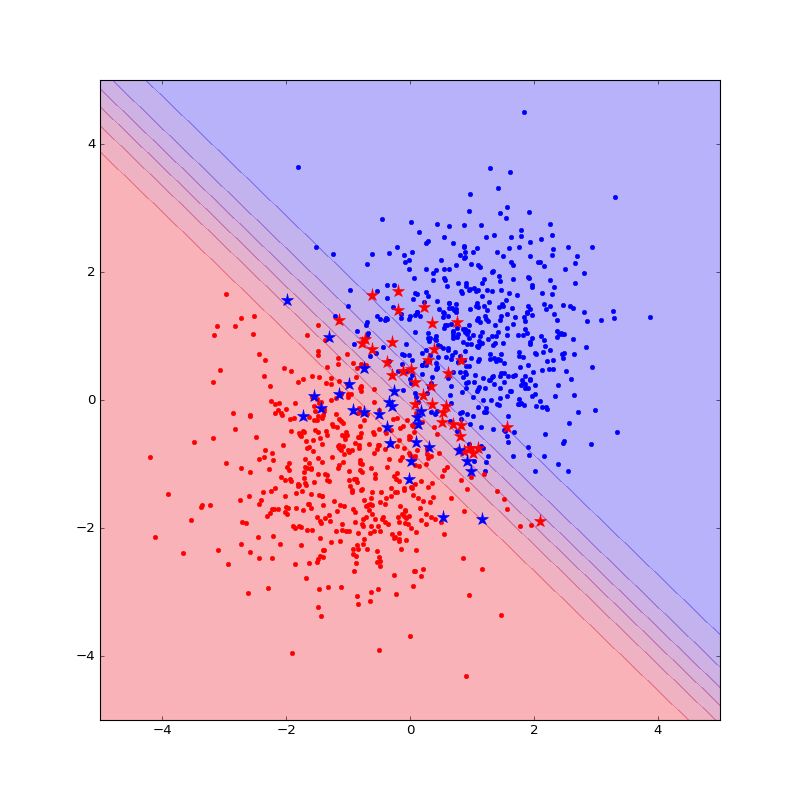

In [5]:
# Make 2D Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
xx, yy = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w)).reshape(xx.shape)


ax.contourf(xx, yy, Z, cmap='red_blue_classes', alpha=0.3)
ax.plot(X[idx_tp, 0], X[idx_tp, 1], ls='', marker='o', markersize=4, markeredgecolor='b', markerfacecolor='b')
ax.plot(X[idx_fp, 0], X[idx_fp, 1], ls='', marker='*', markersize=12, markeredgecolor='r', markerfacecolor='r')
ax.plot(X[idx_tn, 0], X[idx_tn, 1], ls='', marker='o', markersize=4, markeredgecolor='r', markerfacecolor='r')
ax.plot(X[idx_fn, 0], X[idx_fn, 1], ls='', marker='*', markersize=12, markeredgecolor='b', markerfacecolor='b')

<IPython.core.display.Javascript object>


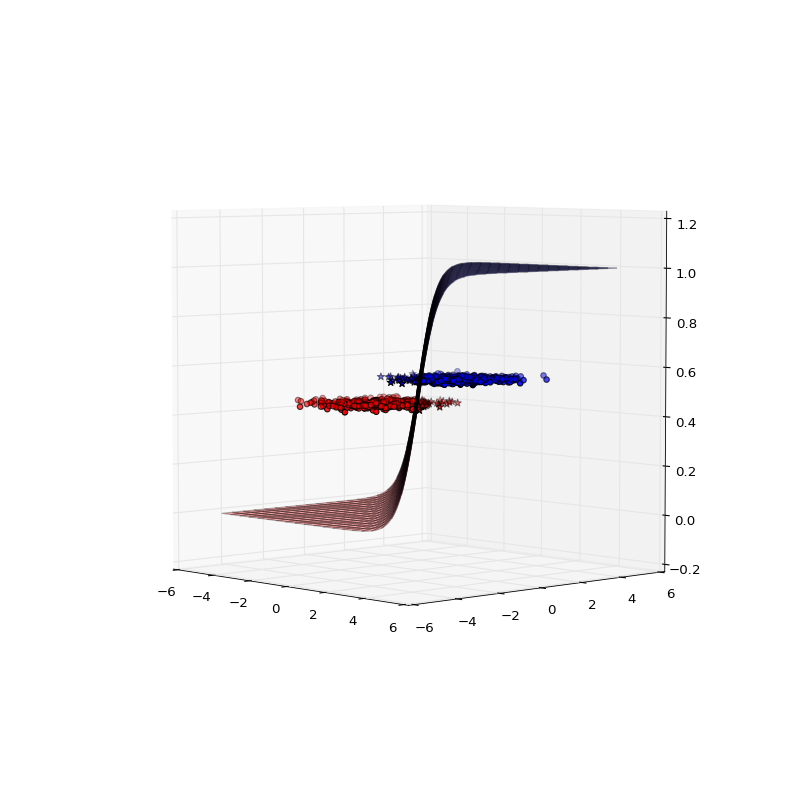

In [6]:
# Make 3D Plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
xx, yy = np.meshgrid(np.linspace(-5, 5, 200), np.linspace(-5, 5, 200))
Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], w)).reshape(xx.shape)
ax.plot_surface(xx, yy, Z, cmap='red_blue_classes', alpha=0.3)
#ax.scatter(X[:, 0], X[:, 1], c=y, cmap='red_blue_classes', alpha=1)
ax.scatter(X[idx_tp, 0], X[idx_tp, 1], np.ones(np.sum(idx_tp)) * 0.55, marker='o', s=25, c='b')
ax.scatter(X[idx_fp, 0], X[idx_fp, 1], np.ones(np.sum(idx_fp)) * 0.45, marker='*', s=45, c='r')
ax.scatter(X[idx_tn, 0], X[idx_tn, 1], np.ones(np.sum(idx_tn)) * 0.45, marker='o', s=25, c='r')
ax.scatter(X[idx_fn, 0], X[idx_fn, 1], np.ones(np.sum(idx_fn)) * 0.55, marker='*', s=45, c='b')